In [1]:
import numpy as np
import swiftest

In [2]:
swiftersim = swiftest.Simulation(simdir="swifter_sim", read_data=True, codename="Swifter")

Reading Swifter file /home/daminton/git_debug/swiftest/examples/rmvs_swifter_comparison/8pl_16tp_encounters/swifter_sim/param.in
Reading in time 2.330e+04
Creating Dataset
Successfully converted 234 output frames.
Swifter simulation data stored as xarray DataSet .data


In [3]:
swiftestsim = swiftest.Simulation(simdir="swiftest_sim",read_data=True)
swiftestsim.data = swiftestsim.data.swap_dims({"name" : "id"})

Reading Swiftest file /home/daminton/git_debug/swiftest/examples/rmvs_swifter_comparison/8pl_16tp_encounters/swiftest_sim/param.in

Creating Dataset from NetCDF file
Successfully converted 1 output frames.

Creating Dataset from NetCDF file
Successfully converted 367 output frames.
Swiftest simulation data stored as xarray DataSet .data
Reading initial conditions file as .init_cond
Finished reading Swiftest dataset files.


In [4]:
swiftdiff = swiftestsim.data - swiftersim.data

In [5]:
plid = swiftdiff['id'].where(swiftdiff['id'] < 9, drop=True)
tpid = swiftdiff['id'].where(swiftdiff['id'] >= 9, drop=True)

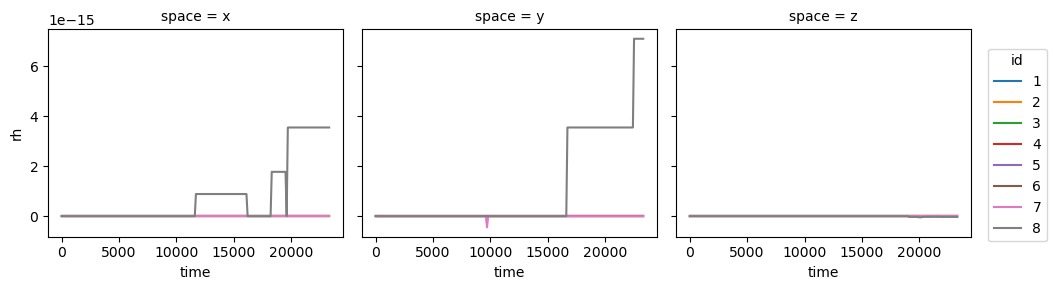

In [6]:
swiftdiff.sel(id=plid)['rh'].plot(x="time",hue="id",col="space")

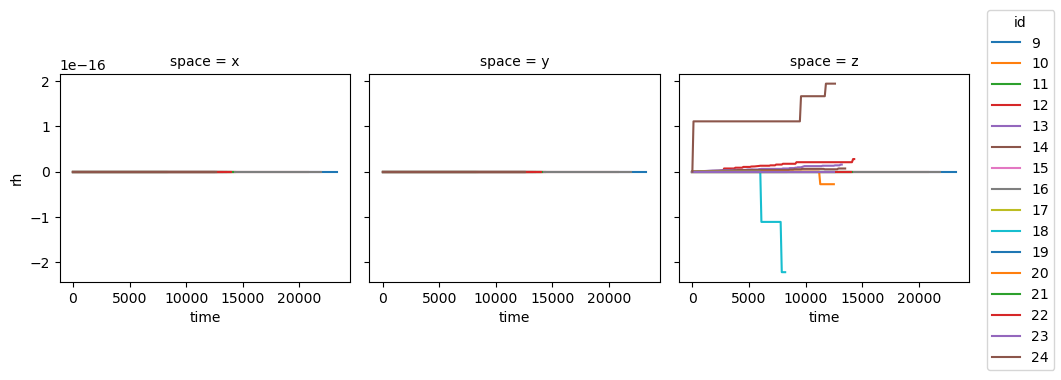

In [7]:
swiftdiff.sel(id=tpid)['rh'].plot(x="time",hue="id",col="space")

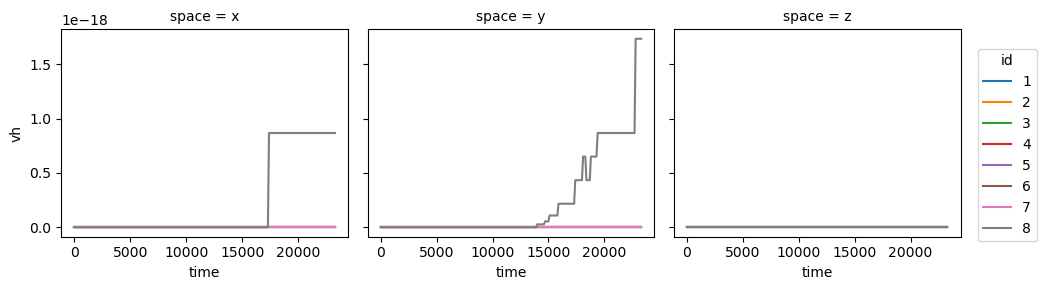

In [8]:
swiftdiff.sel(id=plid)['vh'].plot(x="time",hue="id",col="space")

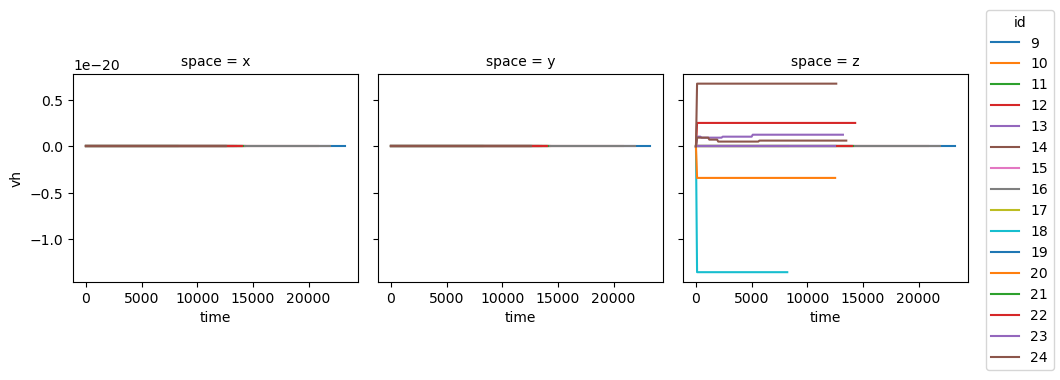

In [9]:
swiftdiff.sel(id=tpid)['vh'].plot(x="time",hue="id",col="space")